In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_excel('./Data/satisfaction.xlsx')

In [3]:
df

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,119211,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,97768,neutral or dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,...,1,3,2,3,3,1,2,1,174,172.0
129877,125368,neutral or dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,...,2,4,4,3,4,2,3,2,155,163.0
129878,251,neutral or dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.columns

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [5]:
df.columns = ['ID', 'Satisfaction', 'Gender', 'Customer_type', 'Age',
       'Type_of_travel', 'Class', 'Flight_distance', 'Seat_comfort',
       'Departure_arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_online_booking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_delay_in_minutes', 'Arrival_delay_in_minutes']

In [6]:
# Replacement of binary string information with int 0 or 1 

df['Satisfaction'] = df['Satisfaction'].apply(lambda value: 1 
if value == 'satisfied' else 0)

df['Gender'] = df['Gender'].apply(lambda value: 1 
if value == 'Female' else 0)

df['Customer_type'] = df['Customer_type'].apply(lambda value: 1 
if value == 'Loyal Customer' else 0)

df['Type_of_travel'] = df['Type_of_travel'].apply(lambda value: 1 
if value == 'Business travel' else 0)

df['Class'] = df['Class'].apply(lambda value: 0 
if value == 'Eco' else 1
if value == 'Eco Plus' else 2)

In [11]:
df.dtypes

ID                                     int64
Satisfaction                           int64
Gender                                 int64
Customer_type                          int64
Age                                    int64
Type_of_travel                         int64
Class                                  int64
Flight_distance                        int64
Seat_comfort                           int64
Departure_arrival_time_convenient      int64
Food_and_drink                         int64
Gate_location                          int64
Inflight_wifi_service                  int64
Inflight_entertainment                 int64
Online_support                         int64
Ease_of_online_booking                 int64
Onboard_service                        int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Cleanliness                            int64
Online_boarding                        int64
Departure_

<AxesSubplot:>

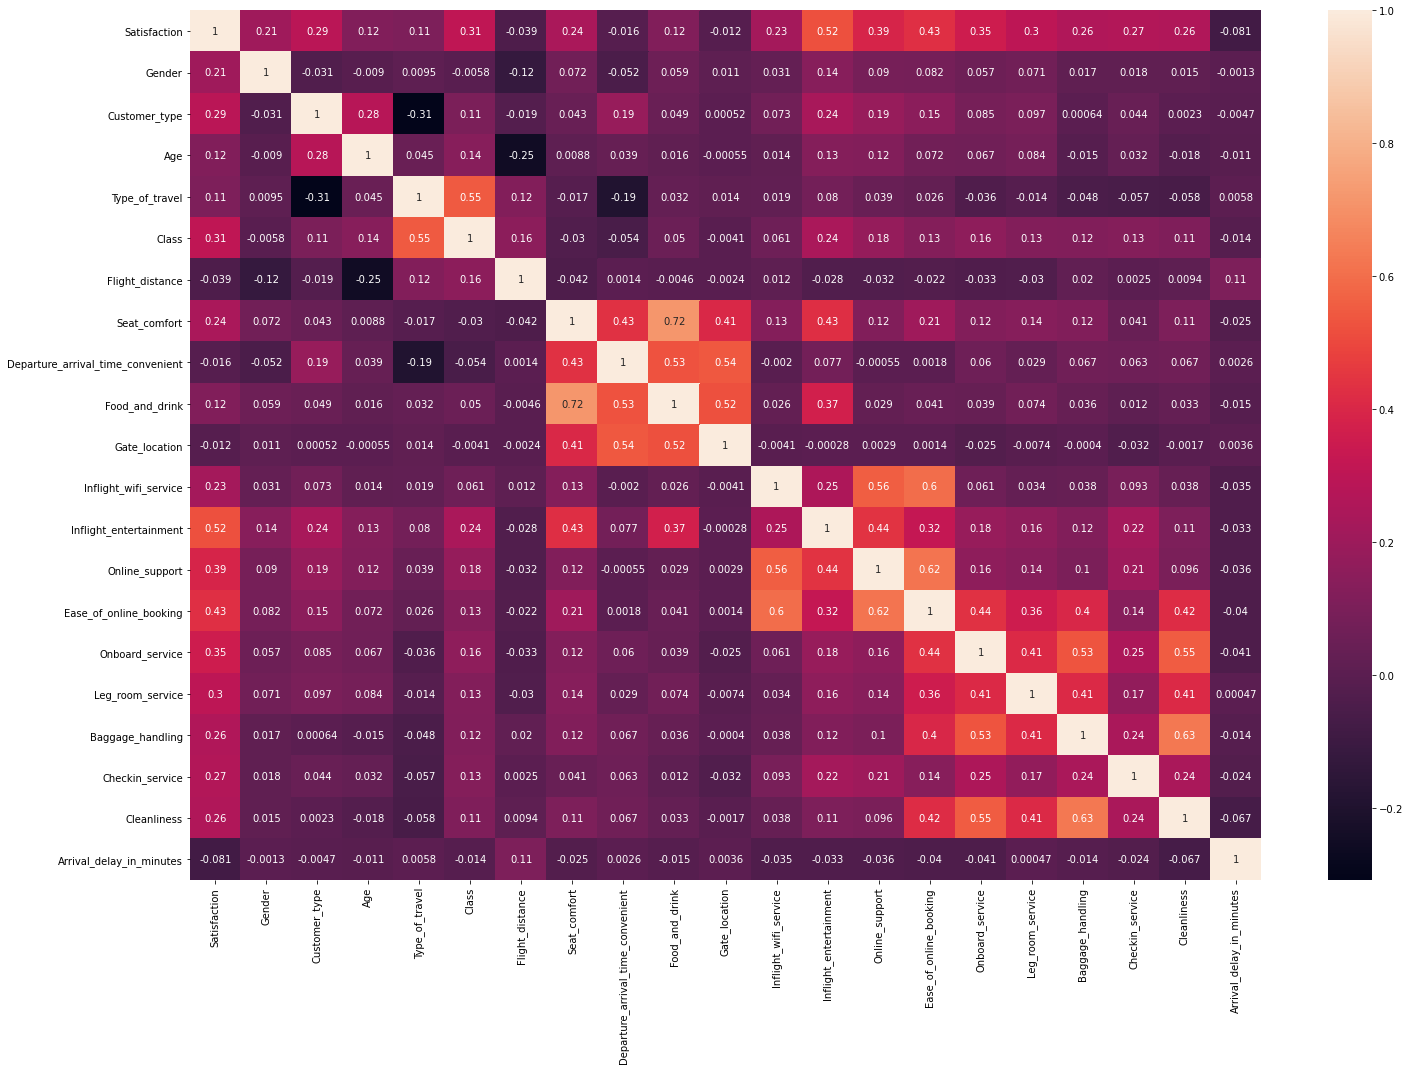

In [16]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [12]:
# Removing highly correlated values to improve ML results

df = df.drop(['ID', 'Departure_delay_in_minutes', 'Online_boarding'], axis = 1)

In [14]:
df[df.Arrival_delay_in_minutes.isna() == True]

,Satisfaction,Gender,Customer_type,Age,Type_of_travel,Class,Flight_distance,Seat_comfort,Departure_arrival_time_convenient,Food_and_drink,...,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_online_booking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Arrival_delay_in_minutes
145,1,1,1,21,0,0,4804,0,2,0,...,5,0,5,5,4,1,4,2,3,NaN
246,1,0,1,28,0,0,1364,0,3,0,...,2,0,4,2,1,1,3,4,3,NaN
710,1,0,1,28,0,0,1792,0,5,0,...,5,0,5,5,4,4,5,3,4,NaN
736,1,0,1,9,0,0,1862,0,5,0,...,3,0,3,3,5,3,4,4,4,NaN
818,0,0,1,9,0,0,1668,1,0,1,...,4,1,4,4,4,5,1,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127739,1,0,1,44,1,2,3431,2,2,3,...,2,2,4,5,5,5,5,5,5,NaN
128131,1,0,1,39,1,2,1595,4,4,4,...,2,4,5,5,5,5,5,3,5,NaN
128710,1,1,1,45,1,0,871,5,1,1,...,5,5,2,5,5,5,5,1,5,NaN
129774,1,0,0,49,0,0,1594,5,4,5,...,3,5,3,3,1,4,3,3,4,NaN


In [15]:
# Replacing the NaN values with the arrival delay mean value

df.Arrival_delay_in_minutes = df.Arrival_delay_in_minutes.fillna(df.Arrival_delay_in_minutes.mean())

In [17]:
# Start ML fitting and training

X = df.iloc[:,1:]
y = np.array(df['Satisfaction'])

X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [18]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression is : 0.8378888204496459
Confusion Matrix : 
[[ 9652  2152]
 [ 2059 12113]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11804
           1       0.85      0.85      0.85     14172

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976



In [19]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.6728453221707859

In [20]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Decision Tree is : 0.9418694179242377
Confusion Matrix : 
[[11023   781]
 [  729 13443]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11804
           1       0.95      0.95      0.95     14172

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [21]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.8827214062609883

Maximum:  1.0
Mean:  0.9103959397185203


<AxesSubplot:>

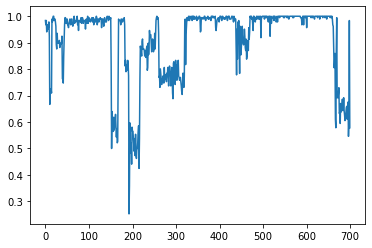

In [22]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=700)
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()

In [23]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

Accuracy Score of Ada Boost Classifier is : 0.93032029565753
Confusion Matrix : 
[[11153   651]
 [ 1159 13013]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11804
           1       0.95      0.92      0.93     14172

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [24]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.8599762126792329

In [25]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=1500, criterion = 'entropy', random_state = 6).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
rf = accuracy_score(y_test, model_rf_prediction)
print('Accuracy Score: ', rf)



Accuracy Score:  0.9610024638127502


In [26]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
print('Kappa: ', kappa_rf)

Kappa:  0.9214952390835738


In [27]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1500).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, model_rf_prediction)

conf_rf = confusion_matrix(y_test, model_rf_prediction)
clf_report_rf = classification_report(y_test, model_rf_prediction)

print(f"Accuracy Score of Random Forest is : {accuracy_rf}")
print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

Accuracy Score of Random Forest is : 0.960655990144749
Confusion Matrix : 
[[11413   391]
 [  631 13541]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11804
           1       0.97      0.96      0.96     14172

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [28]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.9207871306759292

In [29]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.905451185709886
Confusion Matrix : 
[[10630  1174]
 [ 1282 12890]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     11804
           1       0.92      0.91      0.91     14172

    accuracy                           0.91     25976
   macro avg       0.90      0.91      0.90     25976
weighted avg       0.91      0.91      0.91     25976



In [30]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.8094633811142379

In [31]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Ada Boost Classifier is : 0.9267015706806283
Confusion Matrix : 
[[10845   959]
 [  945 13227]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11804
           1       0.93      0.93      0.93     14172

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [32]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.8521600132844134

In [33]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XgBoost Classifier is : 0.9564213119802895
Confusion Matrix : 
[[11321   483]
 [  649 13523]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95 

In [34]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.912215384559535

In [35]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.5
0:	learn: 0.3579941	total: 243ms	remaining: 24s
1:	learn: 0.2655886	total: 353ms	remaining: 17.3s
2:	learn: 0.2148593	total: 463ms	remaining: 15s
3:	learn: 0.1924494	total: 576ms	remaining: 13.8s
4:	learn: 0.1819402	total: 646ms	remaining: 12.3s
5:	learn: 0.1699435	total: 714ms	remaining: 11.2s
6:	learn: 0.1632105	total: 827ms	remaining: 11s
7:	learn: 0.1574021	total: 927ms	remaining: 10.7s
8:	learn: 0.1555396	total: 1.05s	remaining: 10.6s
9:	learn: 0.1532482	total: 1.14s	remaining: 10.3s
10:	learn: 0.1508899	total: 1.22s	remaining: 9.88s
11:	learn: 0.1474065	total: 1.3s	remaining: 9.54s
12:	learn: 0.1403142	total: 1.38s	remaining: 9.23s
13:	learn: 0.1387427	total: 1.45s	remaining: 8.91s
14:	learn: 0.1356071	total: 1.54s	remaining: 8.73s
15:	learn: 0.1333716	total: 1.67s	remaining: 8.76s
16:	learn: 0.1319376	total: 1.78s	remaining: 8.7s
17:	learn: 0.1296764	total: 1.84s	remaining: 8.38s
18:	learn: 0.1256144	total: 1.89s	remaining: 8.06s
19:	learn: 0.1242449	tot

In [36]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.916861226494582

In [37]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Cat Boost Classifier is : 0.9609254696643055
Confusion Matrix : 
[[11410   394]
 [  621 13551]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11804
           1       0.97      0.96      0.96     14172

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [38]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.9213224577359217

In [39]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of Cat Boost Classifier is : 0.9355174006775485
Confusion Matrix : 
[[10994   810]
 [  865 13307]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11804
           1       0.94      0.94      0.94     14172

    accuracy                           0.94     25976
   macro avg       0.93      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [40]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.870004679016504

In [41]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

Learning rate set to 0.5
0:	learn: 0.3579941	total: 77.4ms	remaining: 7.67s
1:	learn: 0.2655886	total: 152ms	remaining: 7.45s
2:	learn: 0.2148593	total: 216ms	remaining: 6.97s
3:	learn: 0.1924494	total: 270ms	remaining: 6.49s
4:	learn: 0.1819402	total: 336ms	remaining: 6.38s
5:	learn: 0.1699435	total: 400ms	remaining: 6.26s
6:	learn: 0.1632105	total: 468ms	remaining: 6.22s
7:	learn: 0.1574021	total: 533ms	remaining: 6.13s
8:	learn: 0.1555396	total: 592ms	remaining: 5.99s
9:	learn: 0.1532482	total: 654ms	remaining: 5.89s
10:	learn: 0.1508899	total: 713ms	remaining: 5.77s
11:	learn: 0.1474065	total: 782ms	remaining: 5.73s
12:	learn: 0.1403142	total: 844ms	remaining: 5.65s
13:	learn: 0.1387427	total: 898ms	remaining: 5.52s
14:	learn: 0.1356071	total: 951ms	remaining: 5.39s
15:	learn: 0.1333716	total: 1.01s	remaining: 5.33s
16:	learn: 0.1319376	total: 1.07s	remaining: 5.22s
17:	learn: 0.1296764	total: 1.16s	remaining: 5.26s
18:	learn: 0.1256144	total: 1.24s	remaining: 5.28s
19:	learn: 0.12

In [42]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

0.9149181872879223

In [45]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier', 'K-Fold Decision Tree'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, 
              accuracy_etc, accuracy_lgbm, accuracy_vc, model_kfdt.mean()],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc, model_kfdt.mean()]
})

# Sorting the results by Kappa values
models_sorted = models.sort_values(by = 'Kappa', ascending = False)
models_sorted.reset_index(drop = True, inplace = True)
models_sorted

,Model,Score,Kappa
0,Extra Trees Classifier,0.960925,0.921322
1,Random Forest Classifier,0.960656,0.920787
2,Cat Boost,0.958731,0.916861
3,Voting Classifier,0.957730,0.914918
4,XgBoost,0.956421,0.912215
5,K-Fold Decision Tree,0.910396,0.910396
6,Decision Tree Classifier,0.941869,0.882721
7,LGBM,0.935517,0.870005
8,KNN,0.930320,0.859976
9,Gradient Boosting Classifier,0.926702,0.852160


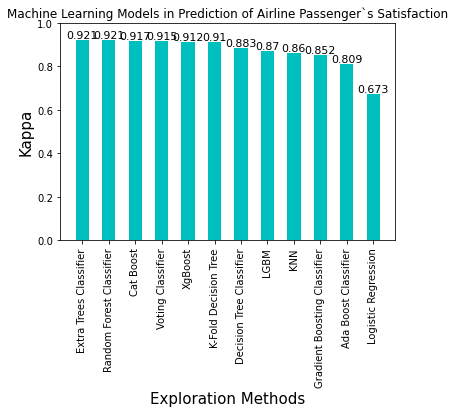

In [44]:
# PLOT: All Kappa values as comparison

plt.bar(x=models_sorted.Model, height = models_sorted.Kappa, color = 'c', width = 0.5)
#plt.grid()
plt.title('Machine Learning Models in Prediction of Airline Passenger`s Satisfaction')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [5, 8]

for i in models_sorted.index:
  plt.text(x = i, 
           y = models_sorted.Kappa[i], 
           s = round(models_sorted.Kappa[i], 3), 
           horizontalalignment='center',
           verticalalignment='bottom',
           size = 11)

plt.show()